In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

In [2]:
"""

Scikit learn comes with pre-loaded dataset, load the digits dataset from that
collection and write a helper function to plot the image using matplotlib.
[Hint: Explore datasets module from scikit learn]

"""

'\n\nScikit learn comes with pre-loaded dataset, load the digits dataset from that\ncollection and write a helper function to plot the image using matplotlib.\n[Hint: Explore datasets module from scikit learn]\n\n'

In [3]:
digit = load_digits()

In [4]:
plt.gray()

<Figure size 432x288 with 0 Axes>

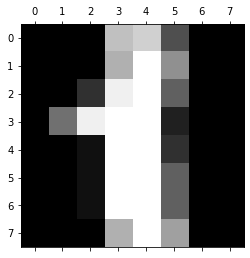

In [5]:
plt.matshow(digit.images[1])

In [6]:
images = digit.images.reshape(digit.images.shape[0], -1)

In [7]:
labels = digit.target

In [8]:
"""2. Make a train -test split with 20% of the data set aside for testing. Fit a logistic
regression model and observe the accuracy.
"""

'2. Make a train -test split with 20% of the data set aside for testing. Fit a logistic\nregression model and observe the accuracy.\n'

In [9]:
train_x,test_x,train_y,test_y=train_test_split(images,labels,random_state=10,test_size=0.20)

In [10]:
log_model=LogisticRegression()

In [11]:
log_model.fit(train_x,train_y)

C:\Users\SENTS-IN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SENTS-IN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
predict_val=log_model.predict(test_x)

In [13]:
metrics.accuracy_score(test_y,predict_val)

0.9583333333333334

In [14]:
"""
3. Using scikit learn perform a PCA transformation such that the transformed
dataset can explain 95% of the variance in the original dataset. Find out the
number of components in the projected subspace.
[Hint: Refer to decomposition module of scikit learn]

"""

'\n3. Using scikit learn perform a PCA transformation such that the transformed\ndataset can explain 95% of the variance in the original dataset. Find out the\nnumber of components in the projected subspace.\n[Hint: Refer to decomposition module of scikit learn]\n\n'

In [15]:
model_pca = PCA(n_components=10)

In [16]:
model_pca.fit(images)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [17]:
model_pca.fit(train_x, train_y)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [18]:
train_x = model_pca.transform(train_x)

In [19]:
test_x = model_pca.transform(test_x)


In [20]:
"""
4. Transform the dataset and fit a logistic regression and observe the accuracy.
Compare it with the previous model and comment on the accuracy.
[Hint: Project both the train and test samples to the new subspace]

"""

'\n4. Transform the dataset and fit a logistic regression and observe the accuracy.\nCompare it with the previous model and comment on the accuracy.\n[Hint: Project both the train and test samples to the new subspace]\n\n'

In [21]:
log_model = LogisticRegression()

In [22]:
log_model.fit(train_x, train_y)


C:\Users\SENTS-IN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SENTS-IN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
predicted_values = log_model.predict(test_x)


In [24]:
metrics.accuracy_score(predicted_values, test_y)

0.9333333333333333

In [25]:
"""
5. Compute the confusion matrix and count the number of instances that has
gone wrong. For each of the wrong sample, plot the digit along with predicted
and original label
"""

'\n5. Compute the confusion matrix and count the number of instances that has\ngone wrong. For each of the wrong sample, plot the digit along with predicted\nand original label\n'

In [26]:
conf_metrics = metrics.confusion_matrix(predicted_values, test_y)

In [29]:
conf_metrics

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  1,  1,  0,  2,  1],
       [ 0,  1, 34,  1,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  0,  1,  0],
       [ 1,  0,  0,  0, 32,  0,  0,  1,  0,  0],
       [ 0,  1,  0,  0,  0, 29,  0,  0,  2,  2],
       [ 0,  0,  0,  0,  0,  0, 36,  0,  1,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 39,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0, 26,  0],
       [ 0,  0,  0,  0,  2,  2,  0,  0,  0, 36]], dtype=int64)

In [27]:
classification_report = metrics.classification_report(predicted_values, test_y)

In [28]:
classification_report

'              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.99        36\n           1       0.91      0.86      0.89        36\n           2       1.00      0.92      0.96        37\n           3       0.93      0.97      0.95        38\n           4       0.94      0.94      0.94        34\n           5       0.91      0.85      0.88        34\n           6       0.97      0.97      0.97        37\n           7       0.97      0.97      0.97        40\n           8       0.79      0.93      0.85        28\n           9       0.92      0.90      0.91        40\n\n    accuracy                           0.93       360\n   macro avg       0.93      0.93      0.93       360\nweighted avg       0.94      0.93      0.93       360\n'